# Assignment04 : K-mean Algorithm with MNIST Number Images
# Name : Joonoh-Oh
# Student-ID : 20146136

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.nan)
#Name: joonoh-oh
#Student-ID: 20146136

# Function for defining intial labels

In [2]:
def initialzeLabel(num_image, k):
    length = num_image
    
    labels = np.empty(length)
    
    for i in range(0, length):
        labels[i] = random.choice(range(0,k))
    
    return labels;

# Function for computing the distance

In [3]:
def computeDistance(list_image, center):
    length = len(list_image)
    
    dist = (list_image - center)**2

    sum_dist = 0;
    for k in range(0, length):
        sum_dist += dist[k]
    return np.sqrt(sum_dist)

# Function for assigning new labels

In [4]:
def assignLabel(list_image, center, k):
    length = len(list_image)
    
    labels = np.empty(length);
    
    dist = np.empty(k);
    
    
    for i in range(0, length):
        min_idx = 0
        for j in range(0,k):
            dist[j] = computeDistance(list_image[i], center[j])
            if(dist[j] <= dist[min_idx]):
                min_idx = j
        labels[i] = min_idx
    
    return labels

# Function for defining centers of the image vectors

In [5]:
def computeCentroid(list_image, labels, k):
    length = len(list_image[0])
    
    sum_l = np.zeros((k, length), dtype=float)
    center = np.empty((k, length), dtype=float)
    count = np.zeros(k)
    
    label = list(range(0, k))
    
    for i in range(0, length):     
        for j in range(0,k):
            if(labels[i] == label[j]):
                count[j] += 1
                sum_l[j] += list_image[i]
    for i in range(0,k):            
        center[i] = sum_l[i] / count[i]
    return center

# Function for calculating energy(error)

In [6]:
def computeEnergy(list_image, o_center, f_center, o_labels, f_labels):
    
    length = len(list_image)
    
    o_energy = 0
    
    f_energy = 0
    
    label = list(range(0, k))
    
    for i in range(0, length):     
        for j in range(0,k):
            if(o_labels[i] == label[j]):
                o_energy += computeDistance(list_image[i], o_center[j])
    
    for i in range(0, length):     
        for j in range(0,k):
            if(f_labels[i] == label[j]):
                f_energy += computeDistance(list_image[i], f_center[j])
    
    
    energy = o_energy - f_energy
    
    return energy

# Function for normalizing image vector values to 0, 1

In [7]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Function for computing accuracy of each cluster

In [8]:
def computeAccuracy(list_label, labels, list_image, k):
    
    count = np.zeros((k, 10), dtype=float)
    
    total = np.zeros(k)
    
    label = list(range(0, k))
    
    
    for i in range(0, len(list_image)):
        for j in range(0, k):
            if(labels[i] == label[j]):
                count[j][list_label[i]] += 1
                total[j] += 1
    
    
    idx = 0
    accuracy = 0
    for i in range(0, k):
        max_c = 0
        for j in range(0, 10):
            if(max_c < count[i][j]):
                max_c = count[i][j]
                idx = j
        
        accuracy += count[i][idx] / total[i]
        
    return accuracy / k

# Function for visualizing through the graph
# (visualizing only the first 200 images because showing whole images is too slow)

In [9]:
def showCluster(f_labels, num_image, list_image, list_label,k):
    list_category = np.zeros((k, int(num_image)), dtype=int)
    count = np.zeros(k, dtype=int)

    for i in range(0, 200):
        for j in range(0, k):
            if(f_labels[i] == j):
                list_category[j][count[j]] = i
                count[j] += 1
    


    for j in range(0, k):
        print("Cluster %d" %(j+1))
        plt.figure(j+1)
        
        if(k <= 3):
            for x in range(0, count[j]):  
                im_matrix = list_image[list_category[j][x]].reshape((size_row, size_col))
                label = list_label[list_category[j][x]]
                plt.subplot(k*k, int(count[j] / k*k) + 1, x+1)
                plt.title(label)
                plt.subplots_adjust(bottom=0.2) 
                plt.imshow(im_matrix, cmap='Greys', interpolation='None')

                frame = plt.gca()
                frame.axes.get_xaxis().set_visible(False)
                frame.axes.get_yaxis().set_visible(False)
        elif(k <= 5):
            for x in range(0, count[j]):  
                im_matrix = list_image[list_category[j][x]].reshape((size_row, size_col))
                label = list_label[list_category[j][x]]
                plt.subplot(k*2, int(count[j] / k*2) + 1, x+1)
                plt.title(label)
                plt.subplots_adjust(bottom=0.2) 
                plt.imshow(im_matrix, cmap='Greys', interpolation='None')

                frame = plt.gca()
                frame.axes.get_xaxis().set_visible(False)
                frame.axes.get_yaxis().set_visible(False)
        else:
            for x in range(0, count[j]):  
                im_matrix = list_image[list_category[j][x]].reshape((size_row, size_col))
                label = list_label[list_category[j][x]]
                plt.subplot(k, int(count[j] / k) + 1, x+1)
                plt.title(label)
                plt.subplots_adjust(bottom=0.2) 
                plt.imshow(im_matrix, cmap='Greys', interpolation='None')

                frame = plt.gca()
                frame.axes.get_xaxis().set_visible(False)
                frame.axes.get_yaxis().set_visible(False)
    
    
        

        plt.show()
            
        
        print("\n")

# Get data from MNIST csv file and save image vectors, 
  \begin{equation}Image=\begin{bmatrix}
         X_{1} \\
         X_{2} \\
         \vdots\\
    \vdots\\
         X_{n} \\
        \end{bmatrix}
          \end{equation}


In [10]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28   
size_col    = 28    

num_image   = len(data)
count       = 0  

list_image  = np.empty((num_image, size_row * size_col), dtype=float)
list_label  = np.empty(num_image, dtype=int)


for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[count, :]    = im_vector    

    count += 1

# Determine the number for categorizing. In this code, k = 3, 5, 10.
# Below k = 3

In [11]:
k = 3

# Visualize image data in each cluster in beginning, when k = 3

Cluster 1


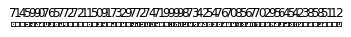



Cluster 2


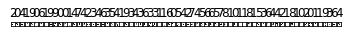



Cluster 3


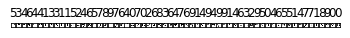

In [12]:
f_labels = initialzeLabel(num_image, k)

f_center = computeCentroid(list_image, f_labels, k)

showCluster(f_labels, num_image, list_image, list_label,k)

# Run k-mean alogirithm and print the energy each time, when k = 3

In [13]:
while True:
    
    labels = f_labels;

    center = f_center;

    f_labels = assignLabel(list_image, f_center, k)

    f_center = computeCentroid(list_image, f_labels, k)
    
    energy = computeEnergy(list_image, center, f_center, labels, f_labels)
    print("Energy: %f" %energy)
    
    accuracy = computeAccuracy(list_label, labels, list_image, k)
    print("Accuracy: %f" %accuracy)
    
    if(energy <= 0):
        break;

Energy: 2703.181982
Accuracy: 0.114691
Energy: 704.415511
Accuracy: 0.267231
Energy: 166.731546
Accuracy: 0.269093
Energy: 89.094804
Accuracy: 0.270772
Energy: 55.085684
Accuracy: 0.270047
Energy: 74.740891
Accuracy: 0.269031
Energy: 147.647704
Accuracy: 0.279238
Energy: 87.889898
Accuracy: 0.290005
Energy: 81.820047
Accuracy: 0.290662
Energy: 64.614107
Accuracy: 0.290106
Energy: 35.947740
Accuracy: 0.290708
Energy: 12.948312
Accuracy: 0.291872
Energy: 6.152033
Accuracy: 0.294239
Energy: 9.651739
Accuracy: 0.295114
Energy: 2.734778
Accuracy: 0.296171
Energy: 0.071588
Accuracy: 0.296948
Energy: 0.000000
Accuracy: 0.297055


# Visualize image data in each cluster at the end, when k = 3

Cluster 1


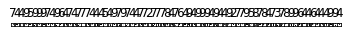



Cluster 2


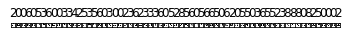



Cluster 3


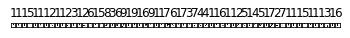

In [14]:
showCluster(f_labels, num_image, list_image, list_label,k)

# Determine the number for categorizing. Here, k = 5.

In [15]:
k = 5

# Visualize image data in each cluster in beginning, when k = 5.

Cluster 1


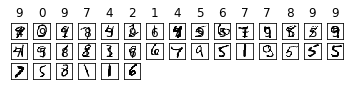



Cluster 2


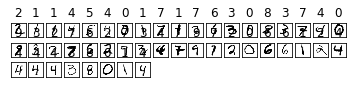



Cluster 3


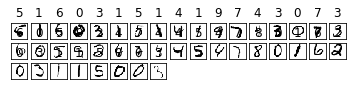



Cluster 4


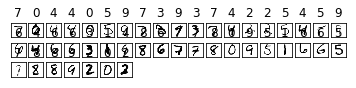



Cluster 5


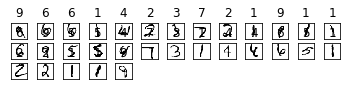

In [16]:
f_labels = initialzeLabel(num_image, k)

f_center = computeCentroid(list_image, f_labels, k)

showCluster(f_labels, num_image, list_image, list_label,k)

# Run k-mean alogirithm and print the energy each time, when k = 5.

In [17]:
while True:
    
    labels = f_labels;

    center = f_center;

    f_labels = assignLabel(list_image, f_center, k)

    f_center = computeCentroid(list_image, f_labels, k)
    
    energy = computeEnergy(list_image, center, f_center, labels, f_labels)
    print("Energy: %f" %energy)
    
    accuracy = computeAccuracy(list_label, labels, list_image, k)
    print("Accuracy: %f" %accuracy)
    
    if(energy <= 0):
        break;

Energy: 3479.244608
Accuracy: 0.113480
Energy: 1502.526675
Accuracy: 0.292127
Energy: 452.887001
Accuracy: 0.374222
Energy: 270.052240
Accuracy: 0.380077
Energy: 200.584818
Accuracy: 0.370129
Energy: 134.647821
Accuracy: 0.364360
Energy: 39.220452
Accuracy: 0.372577
Energy: 32.161922
Accuracy: 0.379757
Energy: 63.019176
Accuracy: 0.390135
Energy: 51.429678
Accuracy: 0.409989
Energy: 44.894579
Accuracy: 0.416268
Energy: 33.799537
Accuracy: 0.416616
Energy: 17.156004
Accuracy: 0.414963
Energy: 31.470488
Accuracy: 0.414322
Energy: 33.149954
Accuracy: 0.413101
Energy: 27.551932
Accuracy: 0.409374
Energy: 16.771335
Accuracy: 0.409304
Energy: 17.763318
Accuracy: 0.407940
Energy: 5.697561
Accuracy: 0.407433
Energy: 6.795501
Accuracy: 0.407060
Energy: 3.182130
Accuracy: 0.406081
Energy: 6.404473
Accuracy: 0.405270
Energy: -4.050414
Accuracy: 0.406399


# Visualize image data in each cluster at the end, when k = 5.

Cluster 1


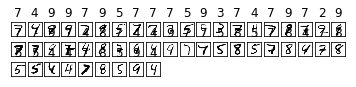



Cluster 2


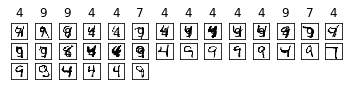



Cluster 3


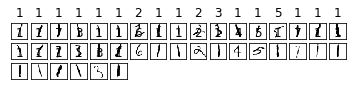



Cluster 4


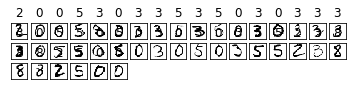



Cluster 5


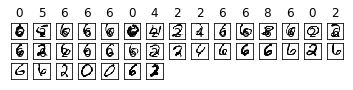

In [18]:
showCluster(f_labels, num_image, list_image, list_label,k)

# Determine the number for categorizing. Here, k = 10.

In [19]:
k = 10

# Visualize image data in each cluster in beginning, when k = 10.

Cluster 1


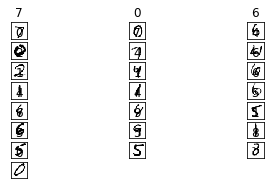



Cluster 2


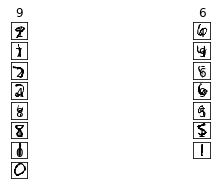



Cluster 3


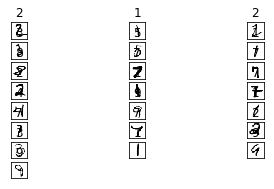



Cluster 4


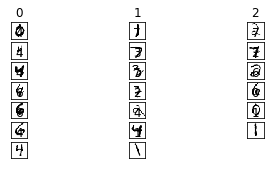



Cluster 5


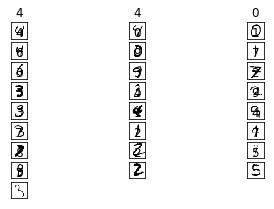



Cluster 6


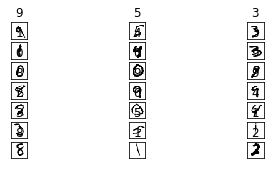



Cluster 7


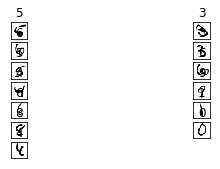



Cluster 8


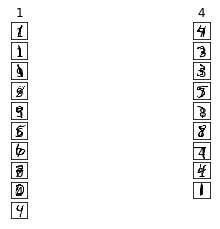



Cluster 9


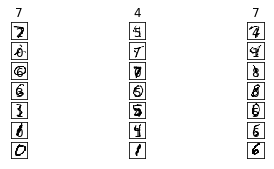



Cluster 10


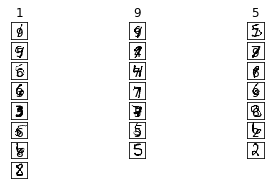

In [20]:
f_labels = initialzeLabel(num_image, k)

f_center = computeCentroid(list_image, f_labels, k)

showCluster(f_labels, num_image, list_image, list_label,k)

# Run k-mean alogirithm and print the energy each time, when k = 10.

In [21]:
while True:
    
    labels = f_labels;

    center = f_center;

    f_labels = assignLabel(list_image, f_center, k)

    f_center = computeCentroid(list_image, f_labels, k)
    
    energy = computeEnergy(list_image, center, f_center, labels, f_labels)
    print("Energy: %f" %energy)
    
    accuracy = computeAccuracy(list_label, labels, list_image, k)
    print("Accuracy: %f" %accuracy)
    
    if(energy <= 0):
        break;

Energy: 6634.205869
Accuracy: 0.117909
Energy: 2165.555965
Accuracy: 0.368449
Energy: 592.742616
Accuracy: 0.454901
Energy: 216.759974
Accuracy: 0.511554
Energy: 74.908688
Accuracy: 0.535153
Energy: 32.411259
Accuracy: 0.552635
Energy: 13.972132
Accuracy: 0.558206
Energy: -5.475473
Accuracy: 0.567434


# Visualize image data in each cluster at the end, when k = 10.

Cluster 1


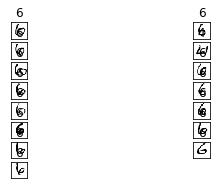



Cluster 2


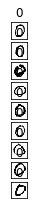



Cluster 3


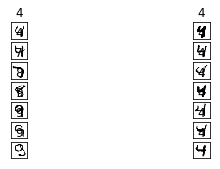



Cluster 4


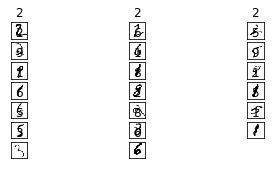



Cluster 5


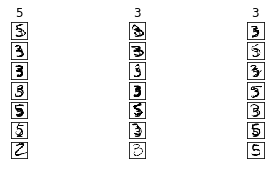



Cluster 6


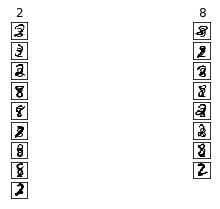



Cluster 7


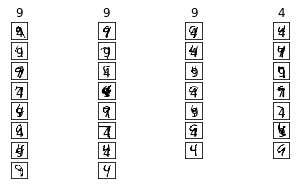



Cluster 8


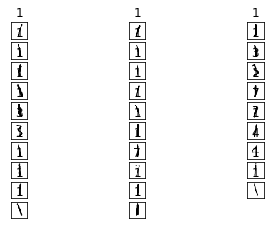



Cluster 9


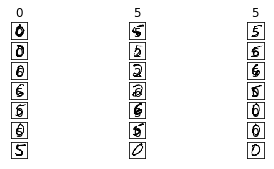



Cluster 10


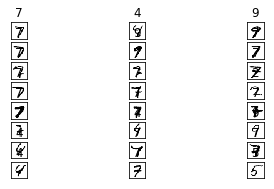

In [22]:
showCluster(f_labels, num_image, list_image, list_label,k)

# Link to Github: https://github.com/jooh95/assignment04